### House grouping system
We want to be able to classify houses according to their region and median income. To do this, we will use the famous **California Housing** dataset. It was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.

In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from pickle import dump

In [2]:
# Load data
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
df_raw.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
7249,2.8155,27.0,4.257353,1.027574,2012.0,3.698529,33.99,-118.12,1.768
1025,3.4609,14.0,8.625304,1.708029,946.0,2.301703,38.48,-120.56,1.209
17722,5.6345,18.0,5.624611,0.956386,2381.0,3.708723,37.33,-121.79,2.310
18430,5.6223,24.0,6.988270,1.005865,1146.0,3.360704,37.26,-121.87,2.657
19281,4.3523,26.0,4.901695,1.003390,884.0,2.996610,38.42,-122.73,1.500
3918,4.2143,34.0,5.402810,0.908665,1168.0,2.735363,34.18,-118.52,2.454
295,1.8710,31.0,5.362832,1.179204,1360.0,3.008850,37.77,-122.17,0.907
15295,2.2500,24.0,4.089431,1.126016,610.0,2.479675,33.16,-117.34,1.875
18595,4.1250,36.0,5.748971,1.189300,661.0,2.720165,37.09,-122.12,2.396
11332,4.6167,25.0,5.777293,0.908297,852.0,3.720524,33.75,-117.96,2.373


In [4]:
#we are only interested in the Latitude, Longitude and MedInc columns.
df = (
    df_raw
    .copy()
    .drop(columns=['HouseAge'])
    .drop(columns=['AveRooms'])
    .drop(columns=['AveBedrms'])
    .drop(columns=['Population'])
    .drop(columns=['AveOccup'])
    .drop(columns=["MedHouseVal"])
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
Latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
Longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100


In [16]:
escaler = StandardScaler()
X_escaled = escaler.fit_transform(df)
X_escaled

array([[ 2.34476576,  1.05254828, -1.32783522],
       [ 2.33223796,  1.04318455, -1.32284391],
       [ 1.7826994 ,  1.03850269, -1.33282653],
       ...,
       [-1.14259331,  1.77823747, -0.8237132 ],
       [-1.05458292,  1.77823747, -0.87362627],
       [-0.78012947,  1.75014627, -0.83369581]])

In [17]:
df_escaled = pd.DataFrame(X_escaled, columns=["MedInc_Escaled", "Lat_Escaled", "Long_Escaled"])
df_escaled.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc_Escaled,20640.0,6.058892e-17,1.000024,-1.774299,-0.688119,-0.176795,0.459306,5.858286
Lat_Escaled,20640.0,-1.079584e-15,1.000024,-1.447568,-0.796789,-0.642287,0.972957,2.958068
Long_Escaled,20640.0,-8.526513e-15,1.000024,-2.385992,-1.113209,0.538914,0.778496,2.625280


In [18]:
# split the dataset into train and test
X_train, X_test = train_test_split(df_escaled, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc_Escaled,Lat_Escaled,Long_Escaled
14196,-0.321654,-1.367976,1.267645
8267,-0.030620,-0.871699,0.703627
17445,0.150349,-0.455012,-0.454356
14265,-1.014947,-1.377340,1.227714
2271,-0.166583,0.537543,-0.114948


In [19]:
# Training the model
model = KMeans(n_clusters = 3, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [20]:
predictions = model.predict(X_test)

In [21]:
predictions

array([1, 1, 0, ..., 2, 0, 1], dtype=int32)

In [22]:
df_final = pd.DataFrame()
df_final["cluster"] = predictions

In [24]:
df_final

,cluster
0,1
1,1
2,0
3,2
4,0
...,...
4123,1
4124,0
4125,2
4126,0


In [27]:
y_train = list(model.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc_Escaled,Lat_Escaled,Long_Escaled,cluster
14196,-0.321654,-1.367976,1.267645,1
8267,-0.030620,-0.871699,0.703627,1
17445,0.150349,-0.455012,-0.454356,1
14265,-1.014947,-1.377340,1.227714,1
2271,-0.166583,0.537543,-0.114948,0


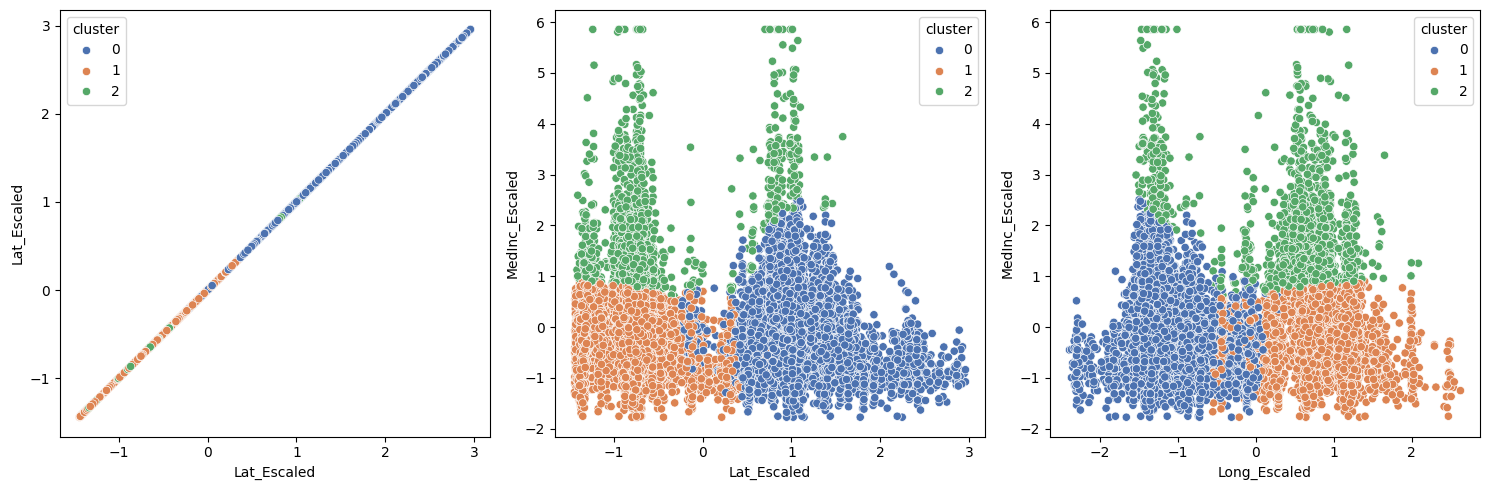

In [29]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Lat_Escaled", y = "Lat_Escaled", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Lat_Escaled", y = "MedInc_Escaled", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Long_Escaled", y = "MedInc_Escaled", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

In [30]:
y_test = list(model.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc_Escaled,Lat_Escaled,Long_Escaled,cluster
20046,-1.152489,0.200449,0.279366,1
3024,-0.705015,-0.230283,0.054757,1
15663,-0.205588,1.015093,-1.432653,0
20484,0.982710,-0.632923,0.424114,2
9814,-0.076678,0.462633,-1.178096,0


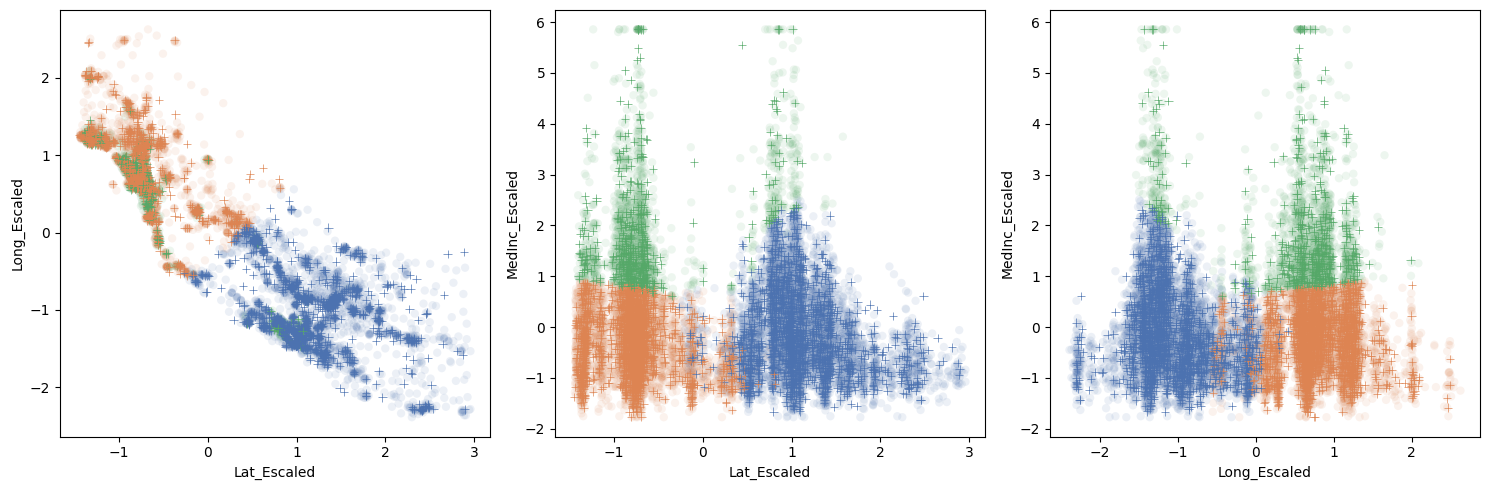

In [32]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Lat_Escaled", y = "Long_Escaled", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Lat_Escaled", y = "MedInc_Escaled", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Long_Escaled", y = "MedInc_Escaled", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Lat_Escaled", y = "Long_Escaled", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Lat_Escaled", y = "MedInc_Escaled", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Long_Escaled", y = "MedInc_Escaled", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

In [35]:
# Train a Supervised Model
model_sup = DecisionTreeClassifier(random_state = 42)
model_sup.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

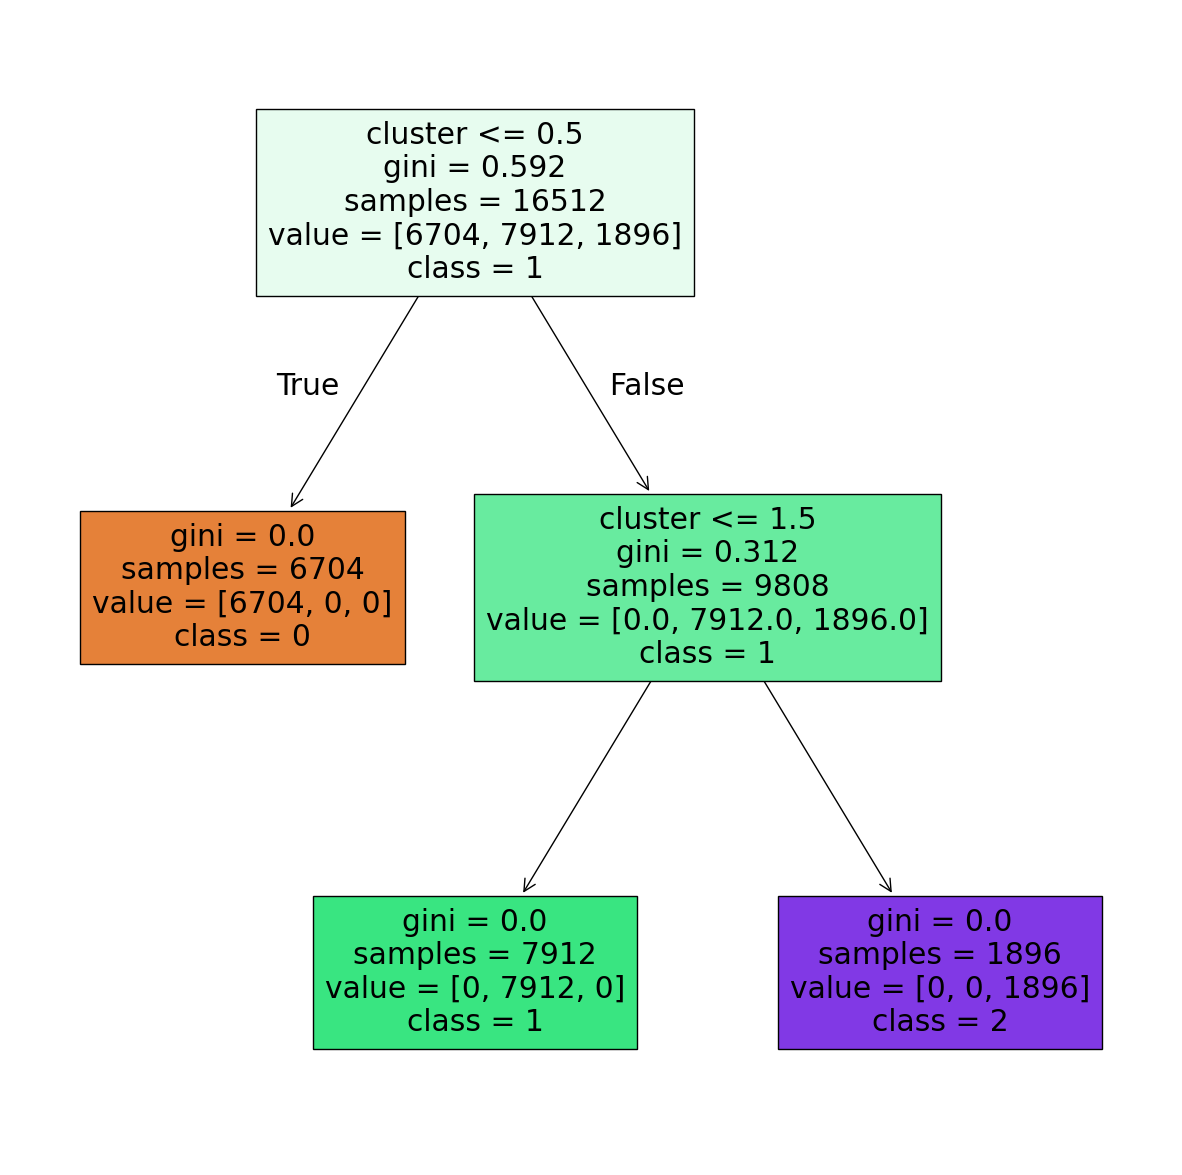

In [37]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [38]:
y_pred = model_sup.predict(X_test)
y_pred

array([1, 1, 0, ..., 2, 0, 1], dtype=int32)

In [41]:
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')

Accuracy score: 1.0


In [45]:
# Save the models
dump(model, open("k-means_default_42.sav", "wb"))
dump(model_sup, open("decision_tree_classifier_default_42.sav", "wb"))